In [1]:
import numpy as np
import pandas as pd

In [ ]:
######## for removing packages
!pip uninstall -y XXXXXXpackage

In [1]:
import pandas as pd
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [3]:
dataset_path = 'ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

# RF on imbalanced data

## Datasets check

In [ ]:
import pandas as pd
from statsmodels.robust.scale import mad


# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features



# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df_features.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

least_variable_genes = ranked_genes[-13000:]
most_variable_genes = ranked_genes[:2000]

# Print the ranked list of genes
print("Ranked genes from most variable to least variable:" )
print(ranked_genes)
print("Least variable:")
print(least_variable_genes)
print('Most variable:')
print(most_variable_genes)

In [3]:
import pandas as pd

# Remove the columns corresponding to the genes in the list
df_filtered = df_features.drop(columns=least_variable_genes)

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'ROSMAP_counts_v10_imbalance_4k.csv'
df_filtered.to_csv(new_csv_file_path, index=True)

In [4]:
dataset_path = 'ROSMAP_counts_v10_imbalance_4k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features

,ENSG00000000971,ENSG00000001617,ENSG00000001626,ENSG00000001630,ENSG00000002587,ENSG00000002745,ENSG00000002746,ENSG00000002933,ENSG00000003096,ENSG00000003137,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
487_120515,5.089801,4.342717,-3.111810,0.166975,3.086104,0.310888,7.080505,4.229403,2.638568,3.534228,...,1.210753,2.973423,2.145368,1.892324,0.680168,0.617244,1.545664,-0.547594,3.269352,2.913610
182_120424,3.071029,2.528274,-1.033960,1.181832,3.830174,1.021351,7.951007,2.420574,3.218771,4.973148,...,0.778337,2.835971,2.417855,1.396146,1.114917,0.277121,0.514422,0.597116,3.664030,2.502630
193_120424,3.485700,2.515583,-0.808607,-0.587615,3.816948,0.945104,7.521900,3.117431,3.289947,5.129640,...,0.287449,2.706385,2.325123,1.281214,1.294638,0.219337,-0.596076,-5.247300,3.774892,1.800074
694_120605,4.746188,2.998472,0.956454,0.818442,2.616238,-2.226673,6.410101,4.475845,1.919275,4.004138,...,-0.966774,1.204182,1.351418,-2.986291,-0.357597,-0.455351,1.506439,-0.391900,3.188582,0.863133
366_120502,5.039985,2.967016,-0.657477,0.360927,2.866296,-0.892768,7.108505,3.365625,2.951688,4.270925,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,5.550509,3.659221,-1.595415,1.208007,3.871698,1.162374,7.162704,3.427154,3.714658,4.620029,...,-0.416202,2.694560,1.821171,2.346634,0.917420,0.227905,-0.805499,-4.915610,4.155401,2.047402
RISK_9_rerun,3.559018,3.617887,-1.589891,0.602893,3.556849,-1.463051,7.374943,4.058607,2.372803,4.910392,...,1.141505,1.465807,1.618501,0.084201,0.165583,0.874431,1.085004,-5.813749,2.268562,0.364139
RISK_93,4.098086,2.137602,-0.871927,-0.736334,4.126750,1.412901,6.960133,3.829547,3.791386,4.497030,...,0.485881,2.477677,1.926980,1.726131,1.341263,-1.029335,0.544776,-3.861985,4.389101,1.381710
RISK_94,4.041678,3.105495,-0.419694,-0.109778,4.166972,0.992736,6.995056,2.807515,3.219758,3.635901,...,0.273251,2.206163,1.937490,1.195124,0.974912,0.340579,0.772254,-5.215149,3.750806,0.504551


In [4]:
metadata_path = '/home/vmottaqi/rnaseq_synapse/backup/metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Filter the metadata for the 'ROSMAP' study
df_metadata = df_metadata[df_metadata['study'] == 'ROSMAP']
df_metadata.drop(columns=['ethnicity', 'study'], inplace=True)
df_metadata.to_csv('metadata_v10_imbalance.csv')

In [2]:
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Create three new columns for each unique value in 'tissue'
df_metadata = pd.get_dummies(df_metadata, columns=['tissue'], prefix='tissue')


df_metadata

,individualID,diagnosis,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,tissue_1,tissue_3,tissue_6
specimenID,,,,,,,,,,,,,,,,,,
487_120515,R9904978,0,1.0,2.0,0,0,4,12.433333,6.9,47.61,72.720055,0.931411,0.225013,0.058488,0.342722,False,True,False
182_120424,R9818080,0,1.0,2.0,0,0,7,16.000000,8.4,70.56,81.111567,0.944450,0.172408,0.041036,0.394201,False,True,False
193_120424,R9817161,1,1.0,2.0,0,1,4,1.750000,7.1,50.41,80.906229,0.958718,0.203963,0.048166,0.357855,False,True,False
694_120605,R9817056,0,1.0,2.0,0,0,4,6.416667,7.1,50.41,87.753593,0.960609,0.201002,0.045065,0.397276,False,True,False
366_120502,R9809661,1,1.0,2.0,1,1,7,17.416667,7.4,54.76,90.000000,0.931962,0.205742,0.048650,0.378299,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,R4703595,0,1.0,2.0,0,1,17,19.500000,7.3,53.29,88.796715,0.980628,0.434482,0.059079,0.220906,False,True,False
RISK_9_rerun,R6776130,0,1.0,2.0,0,1,17,6.500000,1.7,2.89,83.958932,0.932115,0.460919,0.119986,0.179597,False,True,False
RISK_93,R6162454,1,1.0,2.0,0,1,17,6.033333,7.2,51.84,90.000000,0.949833,0.420760,0.047032,0.237576,False,True,False


### Individuals with multiple samples

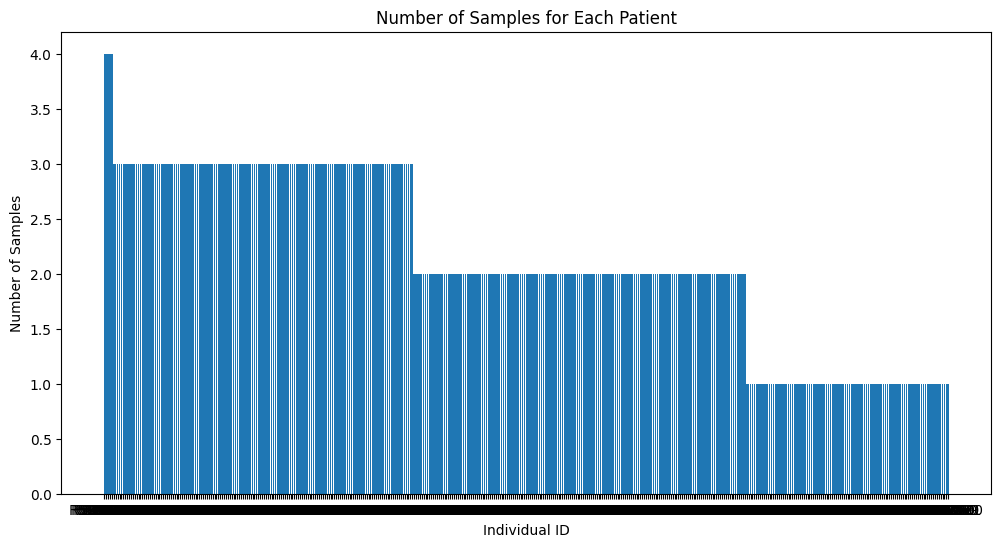

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Count the number of samples for each unique patient
sample_counts = df_metadata['individualID'].value_counts()

# Convert the series to a dataframe for easier plotting
sample_counts_df = sample_counts.reset_index()
sample_counts_df.columns = ['individualID', 'SampleCount']

# Visualize the number of samples for each patient
plt.figure(figsize=(12, 6))
plt.bar(sample_counts_df['individualID'], sample_counts_df['SampleCount'])
plt.xlabel('Individual ID')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Patient')
#plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [8]:
import pandas as pd

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path)

# Group the data by individualID, tissue, and diagnosis, and count the number of samples in each group
grouped = df_metadata.groupby(['individualID', 'tissue', 'diagnosis']).size().reset_index(name='SampleCount')

# Filter the groups where the sample count is two or more
duplicates = grouped[grouped['SampleCount'] >= 2]

# Find the specimenIDs of the samples that are duplicates
duplicate_samples = df_metadata[df_metadata.duplicated(subset=['individualID', 'tissue', 'diagnosis'], keep=False)]

# Merge the duplicate sample info with the duplicates DataFrame
duplicates_with_specimenID = pd.merge(duplicates, duplicate_samples[['specimenID', 'individualID', 'tissue', 'diagnosis']], on=['individualID', 'tissue', 'diagnosis'], how='left')

# Print the information of individuals with two or more samples with the same tissue type and diagnosis, including specimenID
print("Individuals with two or more samples with the same tissue type and diagnosis (including specimenID):")
print(duplicates_with_specimenID)

Individuals with two or more samples with the same tissue type and diagnosis (including specimenID):
   individualID  tissue  diagnosis  SampleCount             specimenID
0      R1498848       3          0            2             1013-DLPFC
1      R1498848       3          0            2        Sample_SM-AYOSS
2      R1901673       3          0            2             1060-DLPFC
3      R1901673       3          0            2        Sample_SM-AYO4G
4      R2688135       3          1            2  Sample_R2688135-DLPFC
5      R2688135       3          1            2               RISK_369
6      R2732138       3          1            2  Sample_R2732138-DLPFC
7      R2732138       3          1            2               RISK_217
8      R3450006       3          1            2  Sample_R3450006-DLPFC
9      R3450006       3          1            2               RISK_218
10     R5009796       3          1            2             205_120424
11     R5009796       3          1            2

In [9]:
# Count the number of unique individuals
num_unique_individuals = df_metadata['individualID'].nunique()

# Print the result
print(f"Total number of unique individuals: {num_unique_individuals}")

Total number of unique individuals: 445


### distribution of gene expression

In [1]:
import pandas as pd
import numpy as np

# Loading the CSV file
df = pd.read_csv("ROSMAP_counts_v10_imbalance_12k.csv", index_col=0)  # Change "your_dataset.csv" to your actual file name

# Calculate mean and variance for each gene (assuming genes are columns)
mean_ex = df.mean(axis=0)
var_ex = df.var(axis=0, ddof=1)

# Creating a new DataFrame with gene names, means, and variances
gene_stats_df = pd.DataFrame({
    "gene_name": df.columns,
    "mean": mean_ex,
    "var": var_ex
})

# Save the new DataFrame to CSV
gene_stats_df.to_csv("gene_statistics.csv", index=False)


In [4]:
df = pd.read_csv('gene_statistics.csv')
df

,gene_name,mean,var
0,ENSG00000000003,3.657952,0.276982
1,ENSG00000000457,3.739001,0.113988
2,ENSG00000000460,2.054945,0.118075
3,ENSG00000000938,3.035054,0.430635
4,ENSG00000000971,4.690103,0.669821
...,...,...,...
11994,ENSG00000288048,0.899498,0.944988
11995,ENSG00000288049,-3.134527,7.401552
11996,ENSG00000288062,3.264750,0.426943
11997,ENSG00000288075,3.356025,0.218391


In [11]:
import pandas as pd
import numpy as np

# Loading the CSV file
df = pd.read_csv("ROSMAP_counts_v10_imbalance_12k.csv", index_col=0)

# Convert all columns to numeric, setting errors='coerce' will convert non-convertible types to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# You can choose to drop all columns that have any NaN values if they were supposed to be numeric
# df = df.dropna(axis=1)

# Calculate mean and variance for each sample (rows)
mean_ex = df.mean(axis=1)
var_ex = df.var(axis=1, ddof=1)

# Assuming the DataFrame's index is meaningful as the sample_id; if not, adjust accordingly.
sample_stats_df = pd.DataFrame({
    "sample_id": df.index,
    "mean": mean_ex,
    "variance": var_ex
})

# Save the new DataFrame to CSV
sample_stats_df.to_csv("sample_statistics.csv", index=False)


In [12]:
df = pd.read_csv('sample_statistics.csv')
df

,sample_id,mean,variance
0,487_120515,3.581256,5.726919
1,182_120424,3.558590,5.765061
2,193_120424,3.560199,5.917456
3,694_120605,3.477775,5.936414
4,366_120502,3.525509,5.972701
...,...,...,...
946,RISK_81,3.580699,5.345608
947,RISK_9_rerun,3.485657,6.454732
948,RISK_93,3.586005,5.109318
949,RISK_94,3.538337,5.501925



Number of genes: 11999
Mean of gene expression means: 3.536
Standard Deviation of gene expression means: 2.307
Median of gene expression means: 3.445
Minimum of gene expression means: -3.61806
Maximum of gene expression means: 12.84
Skewness of gene expression means: 0.3
Kurtosis of gene expression means: -0.5

Number of genes: 11999
Mean of gene expression variances: 0.560
Standard Deviation of gene expression variances: 0.98
Median of gene expression variances: 0.322
Minimum of gene expression variances: 0.08424
Maximum of gene expression variances: 21.30
Skewness of gene expression variances: 9.1
Kurtosis of gene expression variances: 128.0



/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

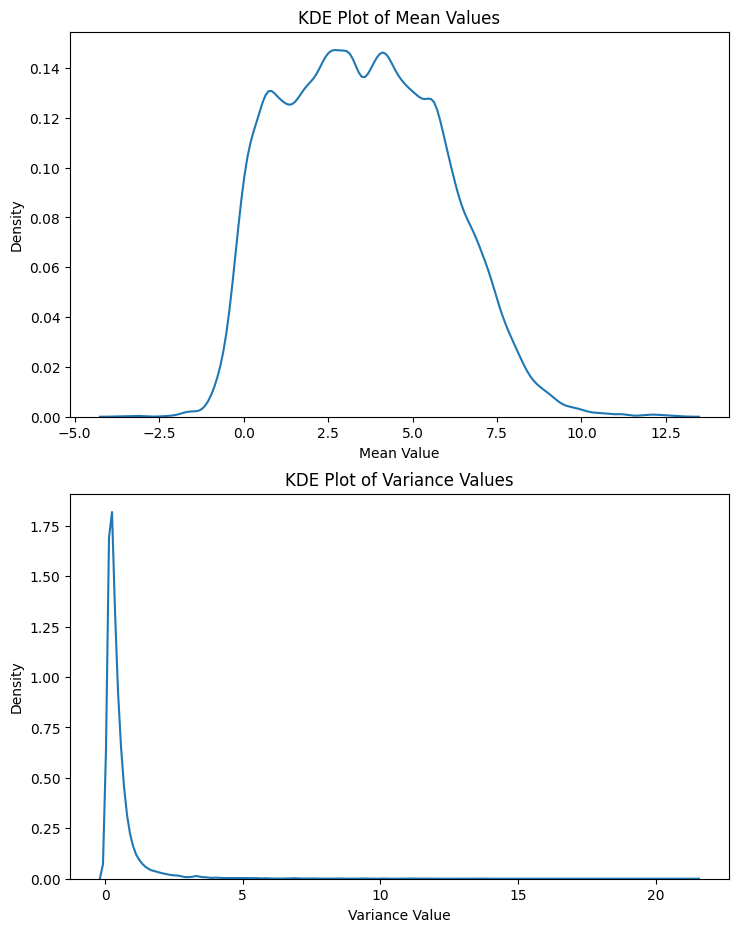

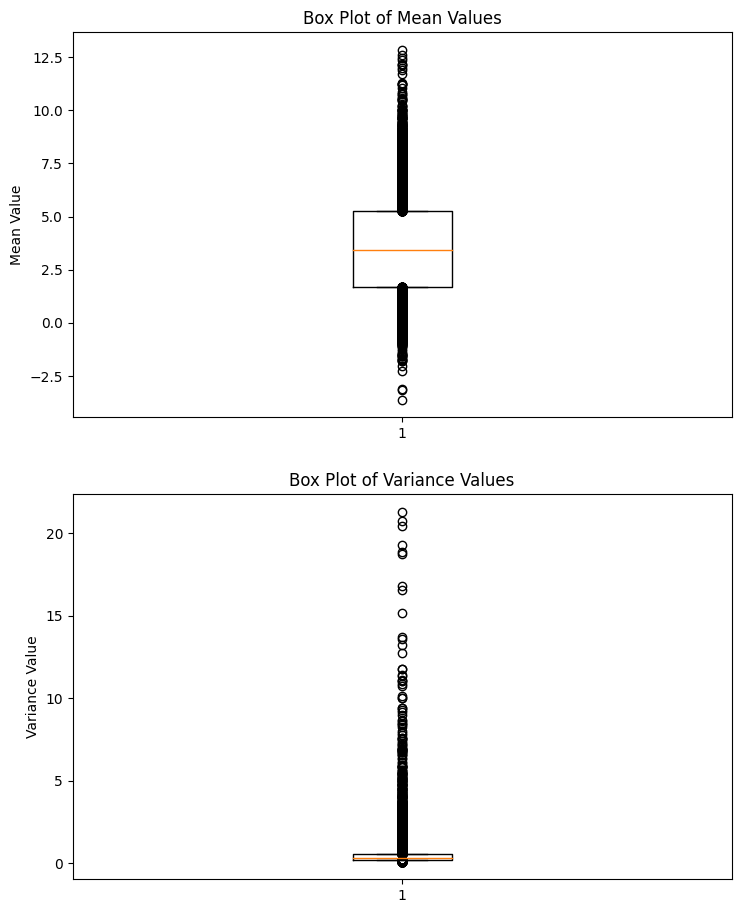

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# read csv file
df = pd.read_csv('gene_statistics.csv')

# compute statistics for mean column
mean_col = df['mean']
mean_num_rows = len(mean_col)
mean_mean = np.mean(mean_col)
mean_std = np.std(mean_col)
mean_median = np.median(mean_col)
mean_min = np.min(mean_col)
mean_max = np.max(mean_col)
mean_skew = skew(mean_col)
mean_kurtosis = kurtosis(mean_col)

# compute statistics for variance column
var_col = df['var']
var_num_rows = len(var_col)
var_mean = np.mean(var_col)
var_std = np.std(var_col)
var_median = np.median(var_col)
var_min = np.min(var_col)
var_max = np.max(var_col)
var_skew = skew(var_col)
var_kurtosis = kurtosis(var_col)

# print the statistics to console
print(f'''
Number of genes: {mean_num_rows}
Mean of gene expression means: {mean_mean:.3f}
Standard Deviation of gene expression means: {mean_std:.3f}
Median of gene expression means: {mean_median:.3f}
Minimum of gene expression means: {mean_min:.5f}
Maximum of gene expression means: {mean_max:.2f}
Skewness of gene expression means: {mean_skew:.1f}
Kurtosis of gene expression means: {mean_kurtosis:.1f}

Number of genes: {var_num_rows}
Mean of gene expression variances: {var_mean:.3f}
Standard Deviation of gene expression variances: {var_std:.2f}
Median of gene expression variances: {var_median:.3f}
Minimum of gene expression variances: {var_min:.5f}
Maximum of gene expression variances: {var_max:.2f}
Skewness of gene expression variances: {var_skew:.1f}
Kurtosis of gene expression variances: {var_kurtosis:.1f}
''')

# Visualize data with KDE plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
sns.kdeplot(mean_col, bw_adjust=0.6, ax=axs[0])
axs[0].set_title('KDE Plot of Mean Values')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Density')

sns.kdeplot(var_col, bw_adjust=0.6, ax=axs[1])
axs[1].set_title('KDE Plot of Variance Values')
axs[1].set_xlabel('Variance Value')
axs[1].set_ylabel('Density')

plt.show()

# Visualize data with box plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
axs[0].boxplot(mean_col, whis=[25, 75])
axs[0].set_title('Box Plot of Mean Values')
axs[0].set_ylabel('Mean Value')

axs[1].boxplot(var_col, whis=[25, 75])
axs[1].set_title('Box Plot of Variance Values')
axs[1].set_ylabel('Variance Value')

plt.show()



Number of genes: 951
Mean of gene expression means: 3.536
Standard Deviation of gene expression means: 0.028
Median of gene expression means: 3.535
Minimum of gene expression means: 3.44258
Maximum of gene expression means: 3.71
Skewness of gene expression means: 0.7
Kurtosis of gene expression means: 3.3

Number of genes: 951
Mean of gene expression variances: 5.882
Standard Deviation of gene expression variances: 0.25
Median of gene expression variances: 5.906
Minimum of gene expression variances: 4.58857
Maximum of gene expression variances: 7.35
Skewness of gene expression variances: -0.4
Kurtosis of gene expression variances: 3.6



/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

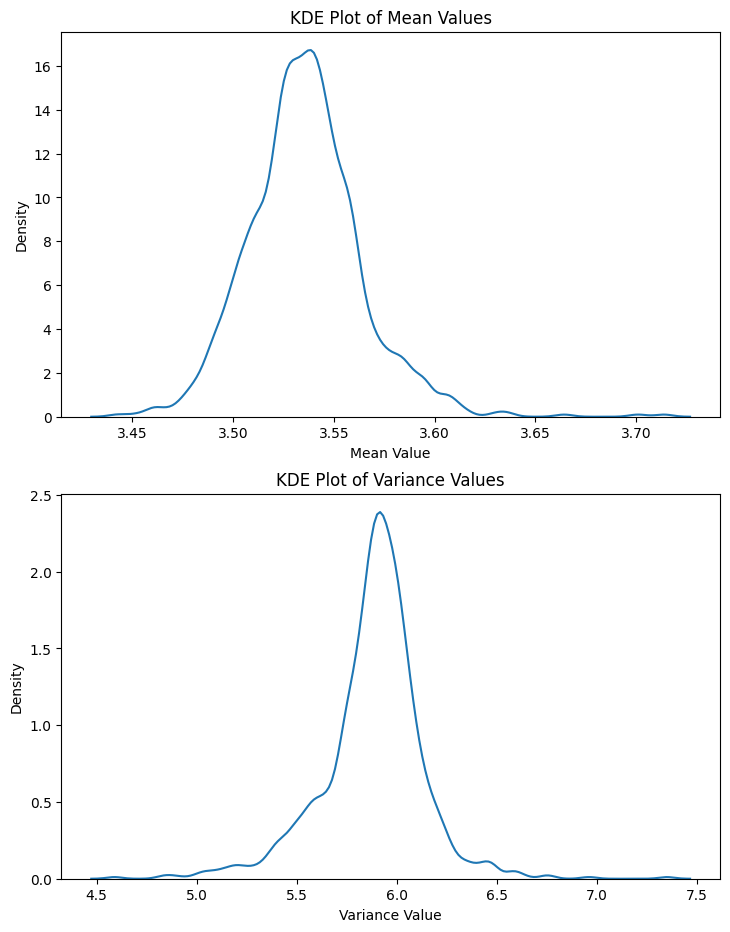

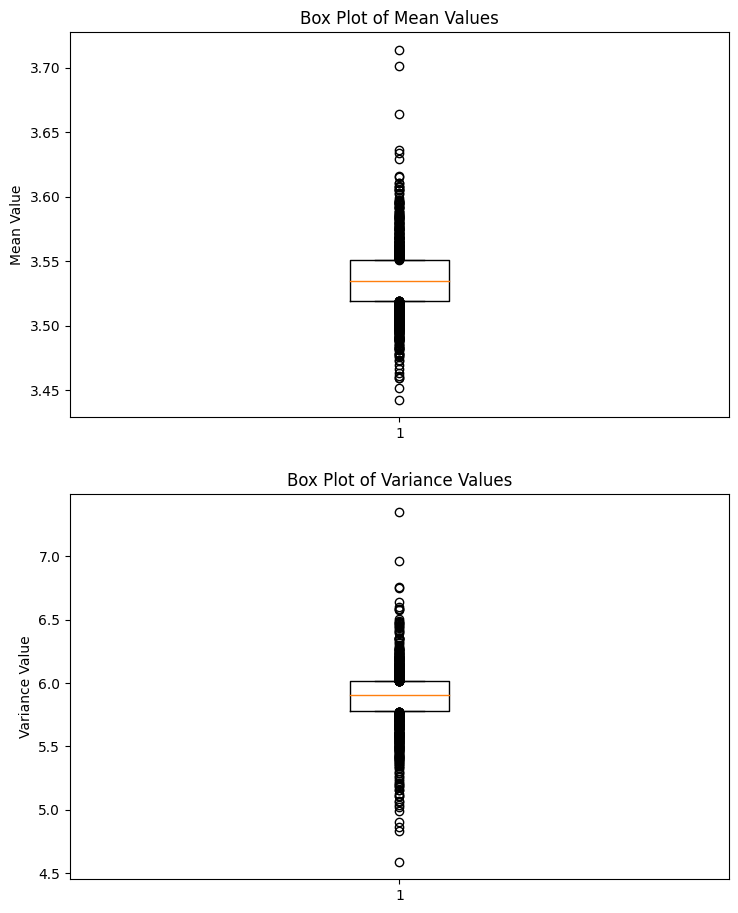

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# read csv file
df = pd.read_csv('sample_statistics.csv')

# compute statistics for mean column
mean_col = df['mean']
mean_num_rows = len(mean_col)
mean_mean = np.mean(mean_col)
mean_std = np.std(mean_col)
mean_median = np.median(mean_col)
mean_min = np.min(mean_col)
mean_max = np.max(mean_col)
mean_skew = skew(mean_col)
mean_kurtosis = kurtosis(mean_col)

# compute statistics for variance column
var_col = df['variance']
var_num_rows = len(var_col)
var_mean = np.mean(var_col)
var_std = np.std(var_col)
var_median = np.median(var_col)
var_min = np.min(var_col)
var_max = np.max(var_col)
var_skew = skew(var_col)
var_kurtosis = kurtosis(var_col)

# print the statistics to console
print(f'''
Number of genes: {mean_num_rows}
Mean of gene expression means: {mean_mean:.3f}
Standard Deviation of gene expression means: {mean_std:.3f}
Median of gene expression means: {mean_median:.3f}
Minimum of gene expression means: {mean_min:.5f}
Maximum of gene expression means: {mean_max:.2f}
Skewness of gene expression means: {mean_skew:.1f}
Kurtosis of gene expression means: {mean_kurtosis:.1f}

Number of genes: {var_num_rows}
Mean of gene expression variances: {var_mean:.3f}
Standard Deviation of gene expression variances: {var_std:.2f}
Median of gene expression variances: {var_median:.3f}
Minimum of gene expression variances: {var_min:.5f}
Maximum of gene expression variances: {var_max:.2f}
Skewness of gene expression variances: {var_skew:.1f}
Kurtosis of gene expression variances: {var_kurtosis:.1f}
''')

# Visualize data with KDE plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
sns.kdeplot(mean_col, bw_adjust=0.6, ax=axs[0])
axs[0].set_title('KDE Plot of Mean Values')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Density')

sns.kdeplot(var_col, bw_adjust=0.6, ax=axs[1])
axs[1].set_title('KDE Plot of Variance Values')
axs[1].set_xlabel('Variance Value')
axs[1].set_ylabel('Density')

plt.show()

# Visualize data with box plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
axs[0].boxplot(mean_col, whis=[25, 75])
axs[0].set_title('Box Plot of Mean Values')
axs[0].set_ylabel('Mean Value')

axs[1].boxplot(var_col, whis=[25, 75])
axs[1].set_title('Box Plot of Variance Values')
axs[1].set_ylabel('Variance Value')

plt.show()


## RF code

### Test 1 RF as baseline

In [4]:
# complete code after 3 blocks

# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
### With clinical variables

import pandas as pd

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)


# Drop the 'xx' column from the metadata (if it exists)
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


target
1    0.646688
0    0.353312
Name: proportion, dtype: float64


In [ ]:
### With clinical variables

from sklearn.model_selection import cross_validate

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the metrics to use
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']

# Perform 4-fold cross-validation with multiple metrics
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring_metrics)

# Print the cross-validation results for each metric
for metric in scoring_metrics:
    #print(f"10-fold CV {metric}: {cv_results['test_' + metric]}")
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

In [ ]:
# Complete code (2 sections)

In [8]:


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Merge the metadata with the gene expression data
df_merged = df_features.merge(df_metadata, left_index=True, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and other non-feature columns from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['batch', 'RIN2','diagnosis', 'individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'])

# Create three new columns for each unique value in 'tissue'
X = pd.get_dummies(X, columns=['tissue'], prefix='tissue')


In [12]:
X

,ENSG00000000003,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001460,ENSG00000001497,ENSG00000001617,...,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107,tissue,apoe4_allele,sex,age_death
specimenID,,,,,,,,,,,,,,,,,,,,,
487_120515,2.693056,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.275373,5.865258,4.342717,...,0.617244,1.545664,-0.547594,3.269352,4.395686,2.913610,3,0,0,72.720055
182_120424,2.952038,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.262465,5.460677,2.528274,...,0.277121,0.514422,0.597116,3.664030,3.934631,2.502630,3,0,0,81.111567
193_120424,2.935881,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.688572,5.541020,2.515583,...,0.219337,-0.596076,-5.247300,3.774892,3.034315,1.800074,3,0,1,80.906229
694_120605,3.970723,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,3.624694,5.717614,2.998472,...,-0.455351,1.506439,-0.391900,3.188582,3.419970,0.863133,3,0,0,87.753593
366_120502,3.555162,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.143737,5.467284,2.967016,...,0.960361,0.552581,-5.109539,3.378009,3.621923,1.674681,3,1,1,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,3.480599,3.794995,2.044125,2.658725,5.550509,3.364785,4.804389,4.117583,4.911736,3.659221,...,0.227905,-0.805499,-4.915610,4.155401,3.197329,2.047402,3,0,1,88.796715
RISK_9_rerun,3.033182,3.430243,1.701873,2.982793,3.559018,3.009816,5.052380,4.041375,5.597510,3.617887,...,0.874431,1.085004,-5.813749,2.268562,3.611761,0.364139,3,0,1,83.958932
RISK_93,4.234210,4.319146,2.264421,2.106420,4.098086,3.708144,5.490788,3.908534,4.570783,2.137602,...,-1.029335,0.544776,-3.861985,4.389101,3.446107,1.381710,3,0,1,90.000000


In [6]:
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42, class_weight={0: 1.5, 1: 1})

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Print classification report for each fold
    print(f"Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.40      0.48        68
           1       0.72      0.86      0.79       123

    accuracy                           0.70       191
   macro avg       0.67      0.63      0.63       191
weighted avg       0.68      0.70      0.68       191


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.42      0.50        67
           1       0.73      0.87      0.80       123

    accuracy                           0.71       190
   macro avg       0.68      0.64      0.65       190
weighted avg       0.70      0.71      0.69       190


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63        67
           1       0.78      0.94      0.85       123

    accuracy                           0.79       190
   macro avg       0.80      0.73   

In [7]:
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Print classification report for each fold
    print(f"Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        34
           1       0.74      0.94      0.83        62

    accuracy                           0.75        96
   macro avg       0.76      0.67      0.68        96
weighted avg       0.76      0.75      0.73        96


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.76      0.82      0.79        61

    accuracy                           0.72        95
   macro avg       0.69      0.67      0.68        95
weighted avg       0.71      0.72      0.71        95


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.75      0.90      0.82        61

    accuracy                           0.75        95
   macro avg       0.74      0.69   

### Hyperparameter tuning

In [14]:
# Complete code (2 sections)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Merge the metadata with the gene expression data
df_merged = df_features.merge(df_metadata, left_index=True, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and other non-feature columns from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['batch', 'RIN2','diagnosis', 'individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'])






from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=1)

# Create scorers for multiple metrics
scorers = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Set up the random search with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring=scorers, refit='precision', cv=5, n_iter=200, verbose=2, n_jobs=5, random_state=42)

# Fit the random search to the data
random_search.fit(X, y)

# Print the best parameters and the best scores for each metric
print("Best parameters:", random_search.best_params_)
for metric in scorers.keys():
    print(f"Best {metric} score:", random_search.cv_results_[f'mean_test_{metric}'][random_search.best_index_])

In [ ]:
# Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50}
# Best precision score: 0.781912216518734
# Best recall score: 0.878048780487805
# Best f1 score: 0.8265381410256409
# Best roc_auc score: 0.8285830531703035

## Masking the dataset to check the RF model

In [2]:
import pandas as pd

# List of columns you want to keep
# columns_to_keep = ['APP', 'APOE', 'PSEN1', 'PSEN2', 'CLU', 'ABCA7', 'SORL1', 'CR1', 'CD33', 'MS4A', 'TREM2', 'PICALM', 'EPHA1', 'MEF2C', 'CASS4']
columns_to_keep = ['ENSG00000142192', 'ENSG00000081189', 'ENSG00000203710', 'ENSG00000143801', 'ENSG00000095970', 'ENSG00000064687', 'ENSG00000080815', 'ENSG00000120885', 'ENSG00000137642', 'ENSG00000087589', 'ENSG00000130203', 'ENSG00000146904', 'ENSG00000284816', 'ENSG00000105383', 'ENSG00000073921']
# grep -o 'ENSG00000142192' test.log | wc -l

# Load your dataset
df = pd.read_csv('ROSMAP_counts_v10_imbalance_12k.csv', index_col=0)

# Mask columns not in the list by setting their values to zero
for column in df.columns:
    if column not in columns_to_keep:
        df[column] = 0

# Save the modified dataset
df.to_csv('counts_masked_imbalance.csv')


In [ ]:
# Negative values for samples

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Initialize a dictionary to store non-zero features for each sample
non_zero_features_per_sample = {}

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Extract non-zero features for the current sample
    non_zero_features = [gene for gene, value in sample_data['shap_values'].items() if value < 0]
    
    # Store the non-zero features in the dictionary
    non_zero_features_per_sample[sample_id] = non_zero_features

# Print the non-zero features for each sample
for sample_id, non_zero_features in non_zero_features_per_sample.items():
    print(f"Sample {sample_id} has the following negative features:")
    print(non_zero_features)
    print()  # Print a newline for better readability


In [ ]:
# Positive values for samples

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Initialize a dictionary to store non-zero features for each sample
non_zero_features_per_sample = {}

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Extract non-zero features for the current sample
    non_zero_features = [gene for gene, value in sample_data['shap_values'].items() if value > 0]
    
    # Store the non-zero features in the dictionary
    non_zero_features_per_sample[sample_id] = non_zero_features

# Print the non-zero features for each sample
for sample_id, non_zero_features in non_zero_features_per_sample.items():
    print(f"Sample {sample_id} has the following Positive features:")
    print(non_zero_features)
    print()  # Print a newline for better readability


In [ ]:
import pickle
import numpy
import pandas

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Check if the sample is from group 1 (AD patients) and is correctly classified
    if sample_data['label'] == 1 and sample_data['correct']:
        # Extract non-zero SHAP values for the current sample
        non_zero_shap_values = {gene: value for gene, value in sample_data['shap_values'].items() if value != 0}
        
        # Print the non-zero SHAP values for the sample
        print(f"Sample {sample_id} has the following non-zero SHAP values:")
        for gene, value in non_zero_shap_values.items():
            print(f"{gene}: {value}")
        print()  # Print a newline for better readability

## RF model and SHAP dict

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import pickle
from sklearn.preprocessing import PolynomialFeatures


def process_fold(train_ix, test_ix, X, y, metadata):
    test_individual_id = metadata.iloc[test_ix[0]]['individualID']
    train_individual_ids = metadata.iloc[train_ix]['individualID']

    # Find indices in the training set that have the same individualID as the test sample
    exclude_ix = train_individual_ids[train_individual_ids == test_individual_id].index

    # Remove these indices from the training set
    train_ix = [ix for ix in train_ix if ix not in exclude_ix]

    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=100,
        min_samples_split=5,
        min_samples_leaf=1,
        max_depth=50,
        random_state=42)
    
    fit = model.fit(X_train, y_train.to_numpy())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0][1]  # Extract probability of class 1 (AD)
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # Select the SHAP values for the predicted class
    relevant_shap_values = shap_values[y_pred[0]]

    specimen_id = metadata.index[test_ix[0]]
    
    print(f'Fold number {test_ix[0]} completed')
    return {
        'specimen_id': specimen_id,
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': {X.columns[i]: relevant_shap_values[0][i] for i in range(len(X.columns))},
        'predictive_score': y_proba,  # Probability of being AD
        'predicted_label': y_pred[0]
    }





# Load data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('metadata_v10_imbalance.csv', index_col=0)
y = metadata['diagnosis']

# Select the additional columns to add to X
additional_columns = metadata[['age_death', 'tissue', 'sex', 'apoe4_allele']]
X = pd.concat([X, additional_columns], axis=1)  # Concatenate the additional columns to X
X = pd.get_dummies(X, columns=['tissue'], prefix='tissue')

# Use Leave-One-Out Cross-Validation
loo = LeaveOneOut()
results = Parallel(n_jobs=2)(delayed(process_fold)(train_ix, test_ix, X, y, metadata) for train_ix, test_ix in loo.split(X))

# Calculate and print model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall model accuracy: {accuracy:.2f}')

report = classification_report(y_true, y_pred, target_names=['Control', 'AD'])
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['fold_num']: result for result in results}
with open('shap_imbalance_v1_12k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved to shap_imbalance_12k.pkl')


Fold number 1 completed


IndexError: index 2 is out of bounds for axis 0 with size 2

# Clustering via CTEC (to be applied later)

## CTEC replication

### h5ad Dataset stats

In [3]:
import scanpy as sc

# Load the dataset
adata = sc.read_h5ad("/home/vmottaqi/rnaseq_synapse/ctec/human_pbmc_GSE96583.h5ad")
print(adata)
print()
print("Shape:", adata.shape)
print()
print("Variables (var):")
print(adata.var)
print()
print("Observations (obs):")
print(adata.obs)

# List of columns to analyze
columns = ['batch', 'tsne1', 'tsne2', 'stim', 'cluster', 'cell', 'multiplets']

# Print statistics for each column
for col in columns:
    print(f"{col}:")
    print("Number of missing values:", adata.obs[col].isnull().sum())
    print("Unique value counts:")
    print(adata.obs[col].value_counts())
    print()


AnnData object with n_obs × n_vars = 29065 × 35635
    obs: 'batch', 'tsne1', 'tsne2', 'stim', 'cluster', 'cell', 'multiplets'
    var: 'gene_ids'

Shape: (29065, 35635)

Variables (var):
                     gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
MT-ND4L       ENSG00000212907
MT-ND4        ENSG00000198886
MT-ND5        ENSG00000198786
MT-ND6        ENSG00000198695
MT-CYB        ENSG00000198727

[35635 rows x 1 columns]

Observations (obs):
                   batch  tsne1  tsne2  stim cluster             cell  \
AAACATACAATGCC-1-0     0    NaN    NaN  ctrl       5      CD4 T cells   
AAACATACATTTCC-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCAGAAA-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCAGCTA-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCATGCA-1-0     0    NaN    NaN  

# Filtering shap values

## Filter and export dict

In [1]:
import pickle
with open('shap_imbalance_v4_4k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [2]:
# Check samples with specific prediction score for GSEA

# Define the score range
lower_bound = 0.75
upper_bound = 0.77

# Find and print the specimen IDs with predictive scores within the specified range
for key, value in shap_values_per_sample.items():
    predictive_score = value.get('predictive_score')
    if lower_bound <= predictive_score <= upper_bound:
        print(f"Specimen ID: {value['specimen_id']} with Predictive Score: {predictive_score}")



Specimen ID: 366_120502 with Predictive Score: 0.76
Specimen ID: 419_120507 with Predictive Score: 0.75
Specimen ID: 280_120430 with Predictive Score: 0.77
Specimen ID: 720_120531 with Predictive Score: 0.76
Specimen ID: 186_120424 with Predictive Score: 0.76
Specimen ID: 695_120605 with Predictive Score: 0.77
Specimen ID: 363_120502 with Predictive Score: 0.75
Specimen ID: 23_120411 with Predictive Score: 0.77
Specimen ID: 532_120516 with Predictive Score: 0.76
Specimen ID: 704_120605 with Predictive Score: 0.77
Specimen ID: Sample_2109-AC with Predictive Score: 0.75
Specimen ID: Sample_2546-AC with Predictive Score: 0.77
Specimen ID: Sample_R6600608-AC with Predictive Score: 0.77
Specimen ID: Sample_R2565200-AC with Predictive Score: 0.75
Specimen ID: 1083-AC with Predictive Score: 0.75
Specimen ID: Sample_R5405023-AC with Predictive Score: 0.76
Specimen ID: Sample_R5374583-AC with Predictive Score: 0.76
Specimen ID: Sample_2064-AC with Predictive Score: 0.76
Specimen ID: Sample_R497

In [3]:
# Define the specimen_id you are looking for
specimen_id_to_find = '280_120430'

# Define the SHAP value threshold
shap_value_threshold = 0.0003

# Find the specimen in the dictionary
for sample_data in shap_values_per_sample.values():
    if sample_data['specimen_id'] == specimen_id_to_find:
        # Extract and print genes with SHAP value higher than the threshold
        genes_above_threshold = [gene for gene, value in sample_data['shap_values'].items() if value > shap_value_threshold]
        break
else:
    print(f"Specimen ID {specimen_id_to_find} not found in the dictionary.")
    
for i in genes_above_threshold:
    print(i)

ENSG00000006047
ENSG00000006747
ENSG00000012817
ENSG00000016602
ENSG00000019991
ENSG00000020577
ENSG00000026103
ENSG00000026508
ENSG00000038945
ENSG00000040608
ENSG00000053702
ENSG00000064886
ENSG00000066294
ENSG00000072163
ENSG00000073756
ENSG00000074317
ENSG00000074410
ENSG00000076864
ENSG00000077264
ENSG00000078401
ENSG00000079101
ENSG00000081923
ENSG00000088827
ENSG00000088836
ENSG00000089169
ENSG00000092295
ENSG00000092607
ENSG00000095397
ENSG00000095970
ENSG00000099715
ENSG00000099725
ENSG00000100583
ENSG00000101187
ENSG00000101447
ENSG00000102317
ENSG00000105227
ENSG00000105711
ENSG00000105877
ENSG00000106327
ENSG00000106976
ENSG00000108786
ENSG00000108932
ENSG00000109846
ENSG00000109906
ENSG00000111087
ENSG00000111181
ENSG00000111907
ENSG00000112312
ENSG00000115107
ENSG00000115353
ENSG00000115523
ENSG00000118640
ENSG00000119973
ENSG00000121316
ENSG00000122012
ENSG00000122367
ENSG00000123119
ENSG00000124713
ENSG00000125144
ENSG00000125430
ENSG00000125538
ENSG00000125733
ENSG0000

In [10]:
# Highest absolute values

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Define the specimen_id you are looking for
specimen_id_to_find = '550_120517'

# Find the specimen in the dictionary and sort genes by absolute SHAP value
for sample_data in shap_values_per_sample.values():
    if sample_data['specimen_id'] == specimen_id_to_find:
        # Sort genes by absolute SHAP value in descending order
        sorted_genes = sorted(sample_data['shap_values'].items(), key=lambda x: abs(x[1]), reverse=True)
        
        # Extract the top 300 genes
        top_300_genes = sorted_genes[:300]
        break
else:
    print(f"Specimen ID {specimen_id_to_find} not found in the dictionary.")

# Print the top 300 genes with their SHAP values
for gene, value in top_300_genes:
    print(f"{gene}")


ENSG00000139410
ENSG00000170791
ENSG00000125772
ENSG00000072818
ENSG00000178104
ENSG00000163257
ENSG00000138036
ENSG00000158186
ENSG00000172922
ENSG00000088836
ENSG00000185414
ENSG00000133195
ENSG00000228058
ENSG00000166535
ENSG00000068745
ENSG00000167747
ENSG00000250486
ENSG00000124713
ENSG00000184117
ENSG00000198952
ENSG00000067057
ENSG00000125534
ENSG00000142731
ENSG00000129353
ENSG00000164104
ENSG00000154188
ENSG00000143772
ENSG00000073350
ENSG00000197044
ENSG00000159176
ENSG00000120594
ENSG00000171105
ENSG00000158169
ENSG00000234494
ENSG00000149922
ENSG00000281327
ENSG00000100246
ENSG00000196517
ENSG00000185532
ENSG00000012223
ENSG00000108932
ENSG00000111961
ENSG00000140688
ENSG00000163507
ENSG00000105643
ENSG00000168209
ENSG00000251867
ENSG00000169696
ENSG00000183196
ENSG00000251669
ENSG00000111328
ENSG00000186834
ENSG00000158201
ENSG00000286699
ENSG00000140105
ENSG00000171388
ENSG00000138792
ENSG00000253642
ENSG00000248275
ENSG00000158019
ENSG00000278266
ENSG00000164978
ENSG0000

In [15]:
# For enterez ID

import pandas as pd

# Load the DataFrame from the text file
df = pd.read_csv('/home/vmottaqi/rnaseq_synapse/enterez.txt', sep='\t', header=None)  # Adjust the separator if needed

# Select the second column (excluding the first row) and print each value on a new line
for value in df.iloc[1:, 1]:
    print(value)

WFDC1
ZNF442
ZNF395
ZNF665
REXO5
PPP1R1A
DYNC2LI1
SEC24D
DUSP4
PRDM6
PALMD
CD248
PRELP
ARSG
PSTPIP1
PIRT
EHD3
ARNT2-DT
UTY
ACY3
EIF1AY
S100A4
HSDL1
ARC
NIPSNAP3A
HSD3B7
MDK
C1R
ALG10
ENOX2
SMIM14-DT
LINC01310
LINC02724
ANKRD37
PPDPF
SMC3
PMF1
SPACA6
FAM110C
PTPRD-AS1
APOBR
NOTUM
CHP1
GPCPD1
EVI2A
HMGB2
DCAF16
CLEC4E
FRMPD1
S100B
LILRB4
POLD4
ANGPT1
IP6K2
DDB2
BNC2
EHD1
ZNF524
MYC
FAM120C
NPIPB3
A2ML1
FAM181B
LNCOC1
DDIT4L
MAP4K5
ELMO3
ACADSB
CDK5R2
ADRB2
RND3
ZNF547
EPAS1
SLC25A13
NFKBIA
MARF1
LINC02615
ANLN
UQCR10
PSD4
MPP4
MICA
SLC35F3
ACP1
LOC107985433
CYP11A1
CDH23
JADE2
NCK2
RABL6
SCAND1
RAB37
ACVRL1
SLC6A9
PAFAH1B3
LINC01012
HMGB3
TCIM
CSRP1
GINS3
IL15
FYB1
POGK
SRRT
FAM53B
SLC16A6
JUND
SLC25A18
ZNF441
FRAT2
HOPX
COL4A3
BOLA3
LEPR
SMAD6
LINC01736
SDHAF3
COG1
LINC00632
TTTY15
USP9Y
LINC00847
LOC403312
BMP8A
MELTF
ITGAX
TRIP10
COBL
RBM43
TBX6
RFLNB
FRYL
LINC00463
PLK4
SLCO4A1
HEXIM1
ACOT4
C6orf62
ALPK1
PRMT8
PHYHD1
GEM
PARD6B
SESN1
ANKRD40
RERG
TEPSIN
SLC4A11
PET100
ZNF718
GCNT4
MR

In [27]:
import pickle
import numpy as np
import pandas as pd
# Load the SHAP values dictionary from the file
with open('shap_imbalance_v6_4k_boots_true.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Count the number of correctly classified AD patients
correctly_classified_ad_patients = sum(
    1 for result in shap_values_per_sample.values() if result['correct'] and result['label'] == 1
)

print(f'Number of correctly classified AD patients: {correctly_classified_ad_patients}')


Number of correctly classified AD patients: 564


In [28]:
# This contains samples with higher than average predcition score among correctly-classified AD samples

# Calculate the average predictive score among AD correctly classified samples
average_score_ad_correct = np.mean([value['predictive_score'] for value in shap_values_per_sample.values() if value['label'] == 1 and value['correct']])

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have a predictive score higher than the average among AD correctly classified samples
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_ad_correct}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


Number of samples in the filtered dictionary: 298


In [ ]:
filtered_dict

In [5]:
with open('shap_22_filtered_total.pkl', 'wb') as f:
    pickle.dump(filtered_dict, f)

In [31]:
with open('shap_22_filtered_total.pkl', 'rb') as f:
    filtered_dict = pickle.load(f)

In [ ]:
filtered_dict

In [30]:
f_d = {
    result['specimen_id']: {
        gene: shap_value for gene, shap_value in result['shap_values'].items() if shap_value > 0.0003
    }
    for result in filtered_dict.values()
}

In [ ]:
f_d

In [ ]:
for i in f_d['560_120517'].keys():
    print(i)

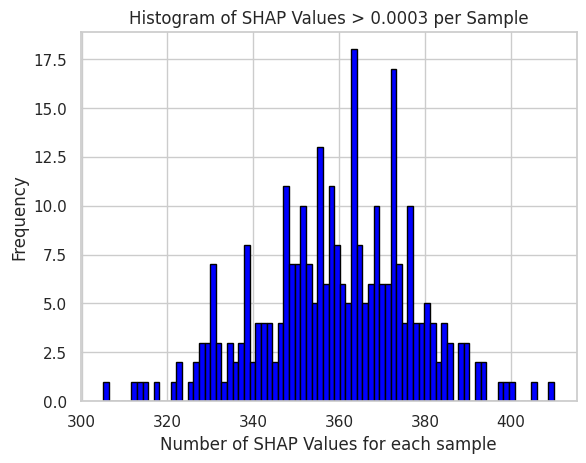

In [31]:
import matplotlib.pyplot as plt

# Using the filtered_dict from the previous step
num_shap_values_per_sample = [len(values) for values in f_d.values()]

# Draw a histogram
plt.hist(num_shap_values_per_sample, bins=80, color='blue', edgecolor='black')
plt.xlabel('Number of SHAP Values for each sample')
plt.ylabel('Frequency')
plt.title('Histogram of SHAP Values > 0.0003 per Sample')
plt.show()


In [35]:
with open('shap_21_filt_positive_g.pkl', 'wb') as f:
    pickle.dump(f_d, f)

In [8]:
with open('shap_22_filt_positive_g.pkl', 'rb') as f:
    f_d = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'shap_22_filt_positive_g.pkl'

In [ ]:
f_d

In [32]:
# List of names to remove
names_to_remove = ['age_death', 'tissue', 'sex', 'apoe4_allele']

# Create a dictionary with specimen ID as key and sorted list of genes (by SHAP values) as values
filtered_dict_genes_only = {
    specimen_id: sorted(
        (gene for gene in shap_values.keys() if gene not in names_to_remove),
        key=lambda gene: shap_values[gene],
        reverse=True
    )
    for specimen_id, shap_values in f_d.items()
}


In [11]:
filtered_dict_genes_only

{'366_120502': ['ENSG00000166535',
  'ENSG00000148482',
  'ENSG00000139410',
  'ENSG00000228058',
  'ENSG00000271714',
  'ENSG00000196517',
  'ENSG00000188783',
  'ENSG00000198417',
  'ENSG00000096060',
  'ENSG00000237422',
  'ENSG00000143382',
  'ENSG00000287134',
  'ENSG00000142530',
  'ENSG00000086159',
  'ENSG00000111087',
  'ENSG00000251442',
  'ENSG00000042062',
  'ENSG00000165092',
  'ENSG00000215580',
  'ENSG00000258701',
  'ENSG00000142731',
  'ENSG00000020577',
  'ENSG00000138400',
  'ENSG00000142449',
  'ENSG00000269067',
  'ENSG00000230537',
  'ENSG00000183963',
  'ENSG00000171388',
  'ENSG00000160883',
  'ENSG00000286215',
  'ENSG00000233396',
  'ENSG00000161896',
  'ENSG00000251669',
  'ENSG00000149591',
  'ENSG00000135046',
  'ENSG00000099725',
  'ENSG00000124191',
  'ENSG00000188599',
  'ENSG00000265179',
  'ENSG00000131002',
  'ENSG00000261701',
  'ENSG00000135926',
  'ENSG00000169258',
  'ENSG00000188039',
  'ENSG00000175147',
  'ENSG00000168209',
  'ENSG00000067048',

In [14]:
with open('shap_22_samp_genes.pkl', 'wb') as f:
    pickle.dump(filtered_dict_genes_only, f)

In [33]:
f_d = filtered_dict_genes_only

### Checking union of shap genes

In [52]:
import pickle
with open('shap_20_samp_genes_550_avg.pkl', 'rb') as f:
    f_d = pickle.load(f)

In [ ]:
f_d

In [34]:
# Assuming your dictionary is stored in a variable named 'filtered_dict_genes_only'
gene_union = set()
for genes in f_d.values():
    gene_union.update(genes)

print(f'Number of unique genes across all patients: {len(gene_union)}')


Number of unique genes across all patients: 3992


## Filtering dataset and metadata -- export csv

### Checking all the datasets (inputs)

In [15]:
with open('shap_22_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

In [ ]:
filtered_dict_genes_only

In [17]:
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

In [ ]:
rnaseq_counts

In [48]:
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [ ]:
metadata

### Code for creating csv of interesting patients

In [18]:
import pandas as pd
import pickle

# Load the dictionary from the pickle file
with open('shap_22_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Load the RNA-seq counts dataset
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

# Load the metadata
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

# Filter the metadata to keep only the samples that are keys in the dictionary
filtered_metadata = metadata.loc[filtered_dict_genes_only.keys()]

# Filter the RNA-seq counts dataset to keep only the samples that are keys in the dictionary
filtered_rnaseq_counts = rnaseq_counts.loc[filtered_dict_genes_only.keys()]

# Merge the filtered RNA-seq counts dataset with the corresponding filtered metadata
merged_dataset = pd.merge(filtered_metadata, filtered_rnaseq_counts, left_index=True, right_index=True)

# Save the merged dataset to a CSV file
output_path = 'ROSMAP_shap_samples_v11_4k_no_weight.csv'
merged_dataset.to_csv(output_path)
print(f'Merged dataset saved to {output_path}')


Merged dataset saved to ROSMAP_shap_samples_v11_4k_no_weight.csv


In [19]:
rnaseq_counts = pd.read_csv('ROSMAP_shap_samples_v11_4k_no_weight.csv', index_col=0)

In [ ]:
rnaseq_counts

In [21]:
rnaseq_counts.columns[:20]
# Study is 17

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'ENSG00000000971', 'ENSG00000001617'],
      dtype='object')

# Clustering samples

## PCA

In [ ]:
df = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]
df

In [ ]:
# Remove the outlier? (2 blocks go ahead!)

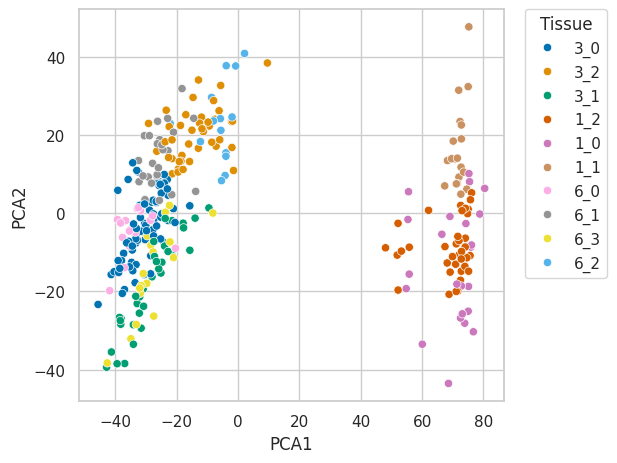

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]

# Separate the features and the target 'tissue' column
features = df.iloc[:, 19:]  # Features start from column 7 (0-based index)
target = df['clusters']

# Run PCA on the features
pca = PCA(n_components=2)  # Adjusted to 2 components for visualization
X_pca = pca.fit_transform(features)

# Encode the 'tissue' labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Tissue": target,
    "label": y_lan
})

# Plot the PCA results
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Tissue", data=pca_df, palette="colorblind")
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#plt.savefig('pca_original.png', dpi=500)
plt.show()


In [ ]:
# Detect the outlier in the pca plot

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)

# Separate the features and the target 'tissue' column
features = df.iloc[:, 18:]  # Adjust features range if necessary
target = df['tissue']

# Run PCA on the features
pca = PCA(n_components=2)  # Using two components for visualization
X_pca = pca.fit_transform(features)

# Encode the 'tissue' labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Tissue": target,
    "label": y_lan
})

# Plot the PCA results
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Tissue", data=pca_df, palette="colorblind")
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

# Define the target point and tolerance
target_pca1 = 74
target_pca2 = 9
tolerance = 1  # Define how close points must be to be considered "around" the target

# Highlight points around the target values by adding annotations to the plot
for i in pca_df.index:
    pca1 = pca_df.loc[i, 'PCA1']
    pca2 = pca_df.loc[i, 'PCA2']
    if (target_pca1 - tolerance <= pca1 <= target_pca1 + tolerance) and \
       (target_pca2 - tolerance <= pca2 <= target_pca2 + tolerance):
        ax.text(pca1, pca2, i, color='red', fontsize=9)

# Save and show the plot
# plt.savefig('pca_target_point.png', dpi=500)
plt.show()


In [85]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)

# Remove the sample with index 'Sample_R1954385-PCC'
df.drop('Sample_R9540861-PCC', inplace=True)

# 

# Save the dataframe back to csv
df.to_csv('ROSMAP_shap_samples_v11_4k.csv')

In [88]:
import pickle

# Specify the path to your pickle file
pkl_file_path = 'shap_21_samp_genes.pkl'

# Load your dictionary from the pickle file
with open(pkl_file_path, 'rb') as pkl_file:
    your_dict = pickle.load(pkl_file)

# Remove the specific sample from your dictionary
sample_to_remove = 'Sample_R9540861-PCC'
if sample_to_remove in your_dict:
    del your_dict[sample_to_remove]

# Save the updated dictionary back to the pickle file
with open('shap_21_samp_genes.pkl', 'wb') as pkl_file:
    pickle.dump(your_dict, pkl_file)


In [ ]:
# To see the eigenvalues (explained variance) for the principal components (PCAs)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)

# Separate the features (assuming features start from column 7)
features = df.iloc[:, 18:]

# Split the dataset into training and validation sets
X_train, X_valid = train_test_split(features, test_size=0.3, random_state=42)

# Initialize PCA with the desired number of components and a fixed random state
n_components = 7  # Adjust this to your desired number of components
pca = PCA(n_components=n_components, random_state=100)

# Fit PCA on the training data and transform both training and validation data
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

# Get the explained variance (eigenvalues) for each principal component
pca_explained_variance = pca.explained_variance_

# Calculate the cumulative sum of eigenvalues (explained variance)
cumulative_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

# Print or use the eigenvalues and cumulative sum of eigenvalues
print("Eigenvalues for each principal component:", pca_explained_variance)
print("Cumulative sum of eigenvalues:", cumulative_sum_eigenvalues)


Eigenvalues for each principal component: [1841.02458317  280.47168245  227.93787233  130.03985864  102.51552171
   67.30866386   58.5553901 ]
Cumulative sum of eigenvalues: [0.46582058 0.53678621 0.59445962 0.62736262 0.65330135 0.67033195
 0.68514778]


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the eigenvalues (explained variance) for each principal component
plt.figure(figsize=(9, 6))
plt.bar(range(1, n_components + 1), pca_explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.savefig('pca_original_eigenvalues.png', dpi=450)
plt.show()

## K-means clustering

### 1. Perform K-means clustering and plot PCA

In [36]:
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)
df_filtered = df[df['tissue'] == 1]
df_filtered

,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
1061-AC,R1528689,1,1,1.0,2.0,1,1,14,5.500000,7.410708,...,-0.526481,0.233320,-0.823759,0.646124,0.783946,-0.167258,1.610778,-4.821235,4.189294,0.183936
Sample_2261-AC,R7583108,1,1,1.0,2.0,1,0,12,4.300000,4.500000,...,-0.580844,-0.654721,-1.130390,1.238031,0.294785,1.286840,2.377250,0.648907,2.945380,0.142186
Sample_2546-AC,R6939144,1,1,1.0,2.0,1,0,12,9.916667,5.000000,...,0.044540,-0.536921,-1.724034,2.159816,0.289312,0.896377,2.080264,0.887041,3.514911,0.239361
Sample_R5989528-AC,R5989528,1,1,1.0,2.0,0,0,13,14.166667,4.400000,...,-1.113986,-0.901567,-0.723493,1.130272,-0.462187,1.320949,1.695249,-0.093729,3.022933,0.077492
Sample_2400-AC,R2346589,1,1,1.0,2.0,0,0,12,13.666667,8.500000,...,-0.666136,-0.158222,-0.967237,3.457827,1.001327,-0.217843,1.473252,0.402310,4.108658,-0.683548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_R6536134-AC,R6536134,1,1,1.0,2.0,0,1,13,3.916667,6.900000,...,-0.499940,-0.330734,-2.085660,2.440954,0.322813,1.002220,2.471278,-5.279641,3.739245,0.173432
Sample_R5573393-AC,R5573393,1,1,1.0,2.0,1,1,13,6.683333,6.400000,...,-0.266485,-0.839549,-0.761862,0.791694,-0.218234,0.334216,1.711021,-4.939976,3.832547,-1.164826
Sample_R1761902-AC,R1761902,1,1,1.0,2.0,0,1,13,6.250000,7.300000,...,-1.248289,-0.363206,-1.537969,2.594687,-0.758599,1.371809,1.911598,-4.954016,3.136420,-0.731281
Sample_R1177802-AC,R1177802,1,1,1.0,2.0,1,0,13,4.000000,5.300000,...,-0.466260,-0.440075,-1.631153,1.793908,0.124932,1.217380,2.347272,0.646171,1.880489,1.259114


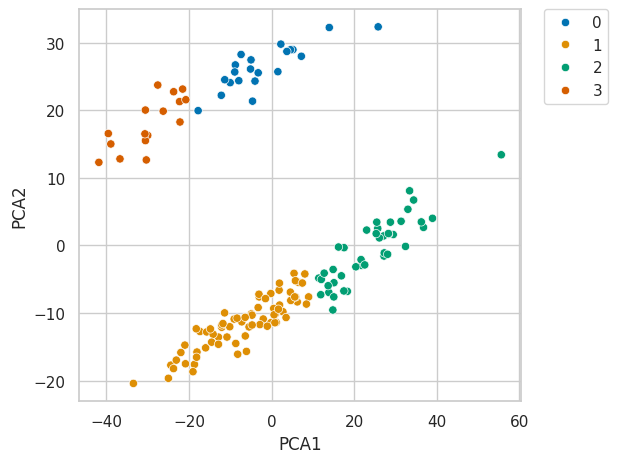

In [78]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)
df = df[df['tissue'] == 3]


# Separate the features (assuming features start from column 7)
features = df.iloc[:, 18:]

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=4, n_init=100, max_iter=1000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)



# Create a DataFrame for PCA results with K-means labels
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "kmeans_labels": kmeans_labels
})

# Plot the PCA results with K-means clustering labels
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="kmeans_labels", data=pca_df, palette="colorblind")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#plt.savefig('pca_5_clusters.png', dpi=450)
plt.show()


In [19]:
kmeans_labels

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1,
       2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

### 2. Verification of number of clusters

#### Elbow method

In [ ]:
# ELbow method for verification:

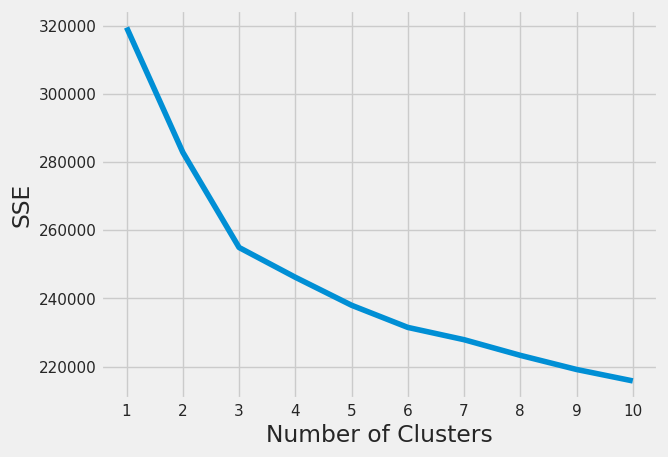

In [74]:
from sklearn.cluster import KMeans

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 100, "max_iter": 800, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the SSE values to find the elbow point
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [48]:
from kneed import KneeLocator

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
elbow_point = kl.elbow

# Print the elbow point
print(f'Elbow point (optimal number of clusters): {elbow_point}')

Elbow point (optimal number of clusters): 4


#### silhouette coefficient

In [ ]:
# silhouette coefficient for each number of clusters (K) 

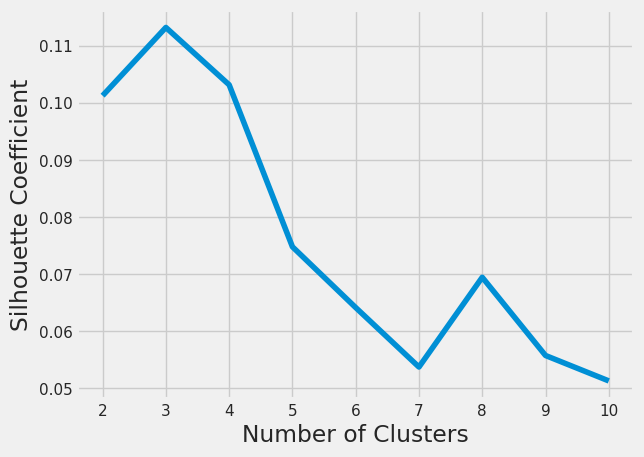

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('ROSMAP_shap_samples_v10.csv', index_col=0)

# Separate the features (assuming features start from column 19)
features = df.iloc[:, 18:]

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 100, "max_iter": 1000, "random_state": 42}

# A list containing all the average silhouette coefficients for each K
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the silhouette coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


### 3. Clustering each tissue and save a new csv file

In [51]:
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)
df

,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
366_120502,R9809661,1,3,1.0,2.0,1,1,7,17.416667,7.4,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
52_120416,R9809441,1,3,1.0,2.0,0,1,6,4.450000,6.4,...,0.635089,0.925383,0.934533,0.243795,-0.272757,0.441563,1.028262,-4.070924,2.869645,1.041287
493_120515,R9771008,1,3,1.0,2.0,0,0,4,3.083333,6.9,...,1.428795,1.639106,0.797550,1.391738,1.096291,1.636495,0.642124,-0.998250,3.053631,1.721891
654_120529,R9254464,1,3,1.0,2.0,0,1,5,7.500000,5.7,...,-0.432613,1.611975,0.995050,1.056309,1.156011,-0.180843,1.239391,-5.325863,3.342447,2.135636
76_120417,R9137173,1,3,1.0,2.0,1,1,4,5.000000,6.7,...,0.326804,1.561044,-0.693230,2.267006,1.651049,0.810119,0.634079,-4.042548,3.783358,1.414760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_437,R9425423,1,3,1.0,2.0,0,1,17,16.516667,2.8,...,0.831489,1.606163,1.261024,0.970229,0.885443,0.769497,-1.164219,-4.505437,3.107846,1.777936
RISK_46_rerun,R6998518,1,6,1.0,2.0,1,1,17,15.666667,1.3,...,1.210712,1.852605,0.874080,1.637173,-0.111618,1.523786,0.782975,-5.904522,1.779158,2.831715
RISK_50_rerun,R1438115,1,6,1.0,2.0,0,1,17,6.750000,2.0,...,0.865323,1.656371,1.406023,1.376175,0.480853,1.533203,-0.687184,-5.655950,2.795944,1.290207
RISK_51_rerun,R1753622,1,3,1.0,2.0,2,1,17,7.266667,1.2,...,0.394446,1.370487,0.705370,0.248185,-0.039540,0.556972,0.763065,-6.118090,2.972036,1.743947


In [86]:
# Step 1, clustering and saving the labels

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Specify the tissue number here for each run
TISSUE_NUMBER = 3  # Change this to 3 and 6 for subsequent runs

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)
df = df[df['tissue'] == TISSUE_NUMBER]

# Separate the features
features = df.iloc[:, 18:]

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=4, n_init=100, max_iter=1000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Save the cluster labels to a file
label_df = pd.DataFrame({'specimen_id': df.index, 'cluster_label': kmeans_labels})
label_df['cluster_label'] = str(TISSUE_NUMBER) + '_' + label_df['cluster_label'].astype(str)
label_filename = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'
label_df.to_csv(label_filename, index=False)

In [87]:
# Step2, Assign_Labels_Script.py

import pandas as pd

# Specify the tissue number and corresponding cluster label file
TISSUE_NUMBER = 3  # Change this for each run (1, 3, 6)
CLUSTER_LABELS_FILE = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'

# Load the dataset and the cluster labels
df = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)
cluster_labels = pd.read_csv(CLUSTER_LABELS_FILE, index_col='specimen_id')

# Check if 'clusters' column exists, if not, create it and insert at the fourth position
if 'clusters' not in df.columns:
    # Create the column with default values
    df.insert(3, 'clusters', pd.NA)  # Use None or np.nan if preferred
    
# Assign the new cluster labels to the 'clusters' column based on the index
df.loc[cluster_labels.index, 'clusters'] = cluster_labels['cluster_label']

# Save the updated dataframe
df.to_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv')


In [63]:
df = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]
df

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
366_120502,R9809661,1,3,3_0,1.0,2.0,1,1,7,17.416667,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
52_120416,R9809441,1,3,3_2,1.0,2.0,0,1,6,4.450000,...,0.635089,0.925383,0.934533,0.243795,-0.272757,0.441563,1.028262,-4.070924,2.869645,1.041287
493_120515,R9771008,1,3,3_1,1.0,2.0,0,0,4,3.083333,...,1.428795,1.639106,0.797550,1.391738,1.096291,1.636495,0.642124,-0.998250,3.053631,1.721891
654_120529,R9254464,1,3,3_2,1.0,2.0,0,1,5,7.500000,...,-0.432613,1.611975,0.995050,1.056309,1.156011,-0.180843,1.239391,-5.325863,3.342447,2.135636
76_120417,R9137173,1,3,3_0,1.0,2.0,1,1,4,5.000000,...,0.326804,1.561044,-0.693230,2.267006,1.651049,0.810119,0.634079,-4.042548,3.783358,1.414760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_437,R9425423,1,3,3_0,1.0,2.0,0,1,17,16.516667,...,0.831489,1.606163,1.261024,0.970229,0.885443,0.769497,-1.164219,-4.505437,3.107846,1.777936
RISK_46_rerun,R6998518,1,6,6_1,1.0,2.0,1,1,17,15.666667,...,1.210712,1.852605,0.874080,1.637173,-0.111618,1.523786,0.782975,-5.904522,1.779158,2.831715
RISK_50_rerun,R1438115,1,6,6_1,1.0,2.0,0,1,17,6.750000,...,0.865323,1.656371,1.406023,1.376175,0.480853,1.533203,-0.687184,-5.655950,2.795944,1.290207
RISK_51_rerun,R1753622,1,3,3_2,1.0,2.0,2,1,17,7.266667,...,0.394446,1.370487,0.705370,0.248185,-0.039540,0.556972,0.763065,-6.118090,2.972036,1.743947


# Common shap genes between clusters

## Common genes, 3 tissues

In [88]:
import pandas as pd
import pickle
from collections import defaultdict

# Load the metadata
metadata = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)

# Sort the specimen IDs based on their tissues and create a dictionary
tissue_specimen_dict = defaultdict(list)
for specimen_id, row in metadata.iterrows():
    tissue_specimen_dict[row['clusters']].append(specimen_id)

In [89]:
tissue_specimen_dict

defaultdict(list,
            {'3_1': ['366_120502',
              '76_120417',
              '397_120503',
              '707_120531',
              '554_120517',
              '663_120530',
              '520_120515',
              '34_120416',
              '94_120417',
              '705_120605',
              '715_120531',
              '56_120417',
              '489_120515',
              '203_120424',
              '550_120517',
              '494_120515',
              '511_120515',
              '280_120430',
              '720_120531',
              '186_120424',
              '695_120605',
              '703_120605',
              '228_120425',
              '497_120515',
              '459_120514',
              '23_120411',
              '444_120507',
              '606_120523',
              '406_120503',
              '560_120517',
              '24_120411',
              '704_120605',
              '436_120507',
              '846_130830',
              '881_130918',
 

In [90]:
# Load the filtered dictionary from the pickle file
with open('shap_21_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Create a new dictionary to store the common genes for each tissue
common_genes_by_tissue = {}

# For each tissue, find the common genes among all specimen IDs
for tissue, specimen_ids in tissue_specimen_dict.items():
    # Get the list of genes for the first specimen ID as the starting point
    common_genes = set(filtered_dict_genes_only[specimen_ids[0]])
    
    # Intersect the gene sets of all other specimen IDs to find the common genes
    for specimen_id in specimen_ids[1:]:
        if specimen_id in filtered_dict_genes_only:  # Check if the specimen ID is in the filtered dictionary
            common_genes &= set(filtered_dict_genes_only[specimen_id])
    
    # Store the common genes in the new dictionary
    common_genes_by_tissue[tissue] = list(common_genes)


In [91]:
common_genes_by_tissue

{'3_1': [],
 '3_2': ['ENSG00000175287'],
 '3_0': ['ENSG00000026508',
  'ENSG00000188783',
  'ENSG00000088836',
  'ENSG00000139410',
  'ENSG00000261701',
  'ENSG00000205106',
  'ENSG00000205929',
  'ENSG00000166535',
  'ENSG00000271714',
  'ENSG00000281327',
  'ENSG00000255020',
  'ENSG00000175287',
  'ENSG00000196517',
  'ENSG00000233396'],
 '3_3': ['ENSG00000165092',
  'ENSG00000142731',
  'ENSG00000234028',
  'ENSG00000122367',
  'ENSG00000271714',
  'ENSG00000053702',
  'ENSG00000145423',
  'ENSG00000254746',
  'ENSG00000286215'],
 '1_2': ['ENSG00000285230',
  'ENSG00000205562',
  'ENSG00000281327',
  'ENSG00000166535',
  'ENSG00000175287',
  'ENSG00000232520'],
 '1_0': ['ENSG00000287689',
  'ENSG00000205562',
  'ENSG00000205929',
  'ENSG00000166535',
  'ENSG00000183196',
  'ENSG00000281327',
  'ENSG00000188039',
  'ENSG00000196517',
  'ENSG00000249577'],
 '1_1': ['ENSG00000177575',
  'ENSG00000287689',
  'ENSG00000285230',
  'ENSG00000261701',
  'ENSG00000102317',
  'ENSG0000028132

In [ ]:
# Find the most prevalent genes in each tissue's samples

In [26]:
import pandas as pd
import pickle
from collections import defaultdict, Counter

# Load the metadata
metadata = pd.read_csv('ROSMAP_shap_samples_v11_4k_no_weight.csv', index_col=0)

# Sort the specimen IDs based on their tissues and create a dictionary
tissue_specimen_dict = defaultdict(list)
for specimen_id, row in metadata.iterrows():
    tissue_specimen_dict[row['tissue']].append(specimen_id)

# Load the filtered dictionary from the pickle file
with open('shap_21_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Create a new dictionary to store the top 20 prevalent genes for each tissue
top_genes_by_tissue = {}

# For each tissue, find the top 20 prevalent genes
for tissue, specimen_ids in tissue_specimen_dict.items():
    # Count the occurrence of each gene across all specimen IDs for the tissue
    gene_counter = Counter()
    for specimen_id in specimen_ids:
        if specimen_id in filtered_dict_genes_only:  # Check if the specimen ID is in the filtered dictionary
            gene_counter.update(filtered_dict_genes_only[specimen_id])
    
    # Find the top 20 genes based on their occurrence count
    top_genes = gene_counter.most_common(20)
    
    # Calculate the percentage of samples in which each gene is present
    top_genes_percentage = [(gene, count / len(specimen_ids) * 100) for gene, count in top_genes]
    
    # Store the top 20 genes with their percentages in the new dictionary
    top_genes_by_tissue[tissue] = top_genes_percentage

# Print the new dictionary to check the results
for tissue, genes in top_genes_by_tissue.items():
    print(f'Tissue {tissue}:')
    for gene, percentage in genes:
        print(f'{gene}: {percentage:.2f}%')
    print()


Tissue 3:
ENSG00000175287: 87.32%
ENSG00000271714: 86.62%
ENSG00000166535: 85.92%
ENSG00000255020: 85.92%
ENSG00000234028: 85.21%
ENSG00000230537: 84.51%
ENSG00000139410: 83.80%
ENSG00000131153: 83.80%
ENSG00000281327: 83.10%
ENSG00000237422: 82.39%
ENSG00000188783: 82.39%
ENSG00000233123: 82.39%
ENSG00000183196: 82.39%
ENSG00000184730: 82.39%
ENSG00000260788: 81.69%
ENSG00000286710: 80.99%
ENSG00000287689: 80.28%
ENSG00000188672: 80.28%
ENSG00000278969: 80.28%
ENSG00000142731: 79.58%

Tissue 1:
ENSG00000166535: 92.21%
ENSG00000281327: 92.21%
ENSG00000175287: 92.21%
ENSG00000196517: 90.91%
ENSG00000287689: 90.91%
ENSG00000285230: 89.61%
ENSG00000205562: 89.61%
ENSG00000257135: 89.61%
ENSG00000232520: 89.61%
ENSG00000261701: 89.61%
ENSG00000205929: 89.61%
ENSG00000188039: 88.31%
ENSG00000183196: 88.31%
ENSG00000249577: 87.01%
ENSG00000251442: 87.01%
ENSG00000137198: 87.01%
ENSG00000188783: 85.71%
ENSG00000053702: 85.71%
ENSG00000157833: 85.71%
ENSG00000102317: 85.71%

Tissue 6:
ENSG0000

## common genes, 5 clusters (k-means)

In [ ]:
# First run the k-means code (block 62)

In [2]:
kmeans_labels

array([3, 2, 4, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 4, 3, 3, 4, 2, 2,
       3, 3, 3, 2, 4, 2, 3, 3, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 4, 4, 2, 3,
       3, 4, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 4, 2, 3, 2, 3, 3, 4, 2, 4, 3,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 4, 3, 2, 4, 4, 3, 3, 3, 3, 2, 4, 2, 3, 3, 2, 2,
       3, 2, 3, 4, 2, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 4, 2, 4, 4, 4, 2, 4,
       4, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 3, 3, 4, 3, 2, 2, 4, 4, 2, 2, 3, 4,
       3, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 4, 4,
       3, 2, 4, 3, 2, 2, 2, 2, 3, 2, 3, 4, 4, 3, 2, 3, 3, 4], dtype=int32)

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import Counter


df = pd.read_csv('ROSMAP_shap_samples_v10.csv', index_col=0)

df['cluster'] = kmeans_labels

# Load the filtered dictionary from the pickle file
with open('shap_20_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Create a new dictionary to store the common genes for each cluster
common_genes_by_cluster = {}

# For each cluster, find the common genes among all specimens in that cluster
for cluster in df['cluster'].unique():
    specimen_ids = df[df['cluster'] == cluster].index
    common_genes = set(filtered_dict_genes_only[specimen_ids[0]])

    for specimen_id in specimen_ids[1:]:
        if specimen_id in filtered_dict_genes_only:
            common_genes &= set(filtered_dict_genes_only[specimen_id])

    common_genes_by_cluster[cluster] = list(common_genes)

# Print the new dictionary to check the results
for cluster, genes in common_genes_by_cluster.items():
    print(f'Cluster {cluster}:')
    for gene in genes:
        print(f'{gene}')
    print()

Cluster 3:

Cluster 2:

Cluster 4:

Cluster 1:

Cluster 0:
ENSG00000125772



In [ ]:
# Finding the most prevalent genes

In [4]:
# Create a new dictionary to store the top 20 prevalent genes for each cluster
top_genes_by_cluster = {}

# For each cluster, find the top 20 prevalent genes
for cluster in df['cluster'].unique():
    # Get the list of specimen IDs for the cluster
    specimen_ids = df[df['cluster'] == cluster].index.tolist()

    # Count the occurrence of each gene across all specimen IDs for the cluster
    gene_counter = Counter()
    for specimen_id in specimen_ids:
        if specimen_id in filtered_dict_genes_only:  # Check if the specimen ID is in the filtered dictionary
            gene_counter.update(filtered_dict_genes_only[specimen_id])

    # Find the top 20 genes based on their occurrence count
    top_genes = gene_counter.most_common(20)

    # Calculate the percentage of samples in which each gene is present
    top_genes_percentage = [(gene, count / len(specimen_ids) * 100) for gene, count in top_genes]

    # Store the top 20 genes with their percentages in the new dictionary
    top_genes_by_cluster[cluster] = top_genes_percentage

# Print the new dictionary to check the results
for cluster, genes in top_genes_by_cluster.items():
    print(f'Cluster {cluster}:')
    for gene, percentage in genes:
        print(f'{gene}: {percentage:.2f}%')
    print()

Cluster 3:
ENSG00000139410: 97.50%
ENSG00000179029: 93.75%
ENSG00000164104: 91.25%
ENSG00000079462: 91.25%
ENSG00000198342: 90.00%
ENSG00000188783: 90.00%
ENSG00000205929: 90.00%
ENSG00000198830: 90.00%
ENSG00000125772: 90.00%
ENSG00000271714: 88.75%
ENSG00000101040: 87.50%
ENSG00000185414: 86.25%
ENSG00000119977: 86.25%
ENSG00000249673: 85.00%
ENSG00000281327: 85.00%
ENSG00000145832: 85.00%
ENSG00000172922: 83.75%
ENSG00000214456: 83.75%
ENSG00000087116: 83.75%
ENSG00000170791: 83.75%

Cluster 2:
ENSG00000185414: 93.33%
ENSG00000205929: 91.67%
ENSG00000159176: 91.67%
ENSG00000157833: 90.00%
ENSG00000111328: 90.00%
ENSG00000251442: 90.00%
ENSG00000164104: 88.33%
ENSG00000111961: 88.33%
ENSG00000249673: 88.33%
ENSG00000281327: 88.33%
ENSG00000188783: 88.33%
ENSG00000260293: 86.67%
ENSG00000139410: 86.67%
ENSG00000125772: 85.00%
ENSG00000158186: 85.00%
ENSG00000125733: 83.33%
ENSG00000178104: 83.33%
ENSG00000143157: 81.67%
ENSG00000126602: 81.67%
ENSG00000261701: 81.67%

Cluster 4:
ENSG0